In [124]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
#from sklearn.utils import shuffle
#from sklearn.model_selection import KFold

                  temperature  humidite  IQ  IQ_J+1  IQ_J+2  IQ_J+3
Date                                                               
29/11/2019 12:00          8.5      73.0   3       4       6       5
29/11/2019 09:00          6.3      90.0   3       4       6       5
29/11/2019 06:00          6.7      95.0   3       4       6       5
29/11/2019 03:00          7.5      91.0   3       4       6       5
29/11/2019 00:00          8.3      97.0   3       4       6       5


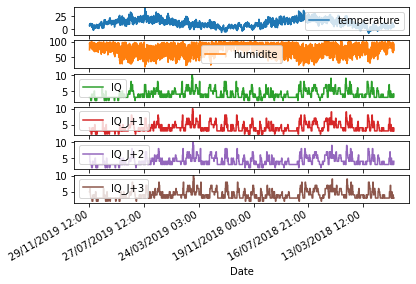

In [125]:
#dataset
CSV_PATH = "Datasets/"
CSV_NAME = "trainingDatasetDplus3.csv"
features_considered = ['temperature','humidite','IQ','IQ_J+1','IQ_J+2','IQ_J+3']

df = pd.read_csv(CSV_PATH+CSV_NAME, header=0, delimiter=';')

features = df[features_considered]
features.index = df['Date']

print(features.head())
features.plot(subplots=True)
plt.show()

dataset = features.values

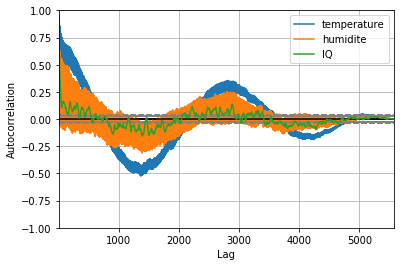

In [126]:
pd.plotting.autocorrelation_plot(features.temperature, label ='temperature')
pd.plotting.autocorrelation_plot(features.humidite, label = 'humidite')
pd.plotting.autocorrelation_plot(features.IQ, label = 'IQ')

In [127]:
def adfuller_test(series,signif=0.05,name='',verbose=False):
    """Perform ADFuller to test for Stationarity of giver series and print report"""
    r = adfuller(series,autolag='AIC')
    output = {'test_statistic':round(r[0],4), 'pvalue':round(r[1],4), 'n_lags':round(r[2],4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val,length= 6):return str(val).ljust(length)
    
    #Print summary
    print(f'Augmented Dickey-Fuller Test on "{name}"', "\n   ", "-"*47)
    print(f'Null Hypothesis: Data has unit root. Non-Stationarity.')
    print(f'Significative Level = {signif}')
    print(f'Test Statistic = {output["test_statistic"]}')
    print(f'No. Lags Chosen = {output["n_lags"]}')
    
    for key,val in r[4].items():
          print(f' Critical value {adjust(key)} = {round(val,3)}')
        
    if p_value <= signif:
          print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
          print(f" => Series is Stationary.")
    else :
          print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
          print(f" => Series is Non-Stationary.")
#ADF Test on each column 
for name,column in features.iteritems():
    adfuller_test(column, name = column.name)
    print('\n')

Augmented Dickey-Fuller Test on "temperature" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationarity.
Significative Level = 0.05
Test Statistic = -3.6738
No. Lags Chosen = 33
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0045. Rejecting Null Hypothesis.
 => Series is Stationary.


Augmented Dickey-Fuller Test on "humidite" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationarity.
Significative Level = 0.05
Test Statistic = -6.8532
No. Lags Chosen = 32
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


Augmented Dickey-Fuller Test on "IQ" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationarity.
Significative Level = 0.05
Test Statistic = -8.1653
No. Lags 

In [128]:
#Split the series into training and testing data
train = dataset[:int(0.8*len(features))]
x_test = dataset[int(0.8*len(features)):,0:3] 

#For the comparison after 
x_train = dataset[:int(0.8*len(features)),0:3]
y_train = dataset[:int(0.8*len(features)),3:]
y_test = dataset[int(0.8*len(features)):,3:]


print(dataset.shape)
print(train.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(5568, 6)
(4454, 6)
(4454, 3)
(4454, 3)
(1114, 3)


In [129]:
#fit model
model = VAR(features)
model_fit = model.fit()
model_fit.summary()

c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Mar, 2020
Time:                     11:42:58
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -2.60206
Nobs:                     5567.00    HQIC:                  -2.63461
Log likelihood:          -39971.4    FPE:                  0.0705076
AIC:                     -2.65203    Det(Omega_mle):       0.0699780
--------------------------------------------------------------------
Results for equation temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -2.630576         0.290022           -9.070           0.000
L1.temperature         0.985573         0.005717          172.401           0.000
L1.humidite            0.031280         0.002438  

In [130]:
#make prediction
prediction = model_fit.forecast(model_fit.y, steps=len(y_test))
print(prediction)

[[ 6.41930509 88.36518618  4.00873674  3.12476426  3.87549017  3.12738512]
 [ 6.85239156 86.25722045  4.01439146  3.23544128  3.78237135  3.22269108]
 [ 7.21654384 84.5681715   4.01766842  3.33330966  3.71490201  3.29397812]
 ...
 [12.15952662 75.41507904  4.11188689  4.11026509  4.10973277  4.10867947]
 [12.15952662 75.41507904  4.11188689  4.11026509  4.10973277  4.10867947]
 [12.15952662 75.41507904  4.11188689  4.11026509  4.10973277  4.10867947]]


c:\program files\python37\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [132]:
def calc_accuracy(y_pred,y_true):
    """
    calculate the accurracy of the prediction according to the true value
    """
    count=0
    for i in range(0,len(y_true)):
        if y_true[i]==round(y_pred[i][0]):
            count+=1
    if count==0:
        return(0)
    return(count/len(y_true)*100)

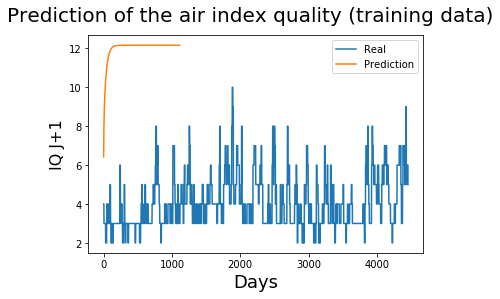

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [133]:
plt.plot(y_train[:,0], label='Real')
plt.plot(prediction[:,0], label='Prediction')
plt.suptitle('Prediction of the air index quality (training data)', fontsize=20)
plt.xlabel('Days', fontsize=18)
plt.ylabel('IQ J+1', fontsize=16)
plt.legend()
plt.show()

print("Accuracy with training data:", round(calc_accuracy(prediction,y_train),0) ,"%")
#print("Mean error with training data:", round(mean_error(y_pred_train,y_train),2))